In [17]:
import os
import pandas as pd
import sklearn.cluster as skc

In [15]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [55]:
def read_and_munge_data(fn, expid, ts, path):
    ipg = pd.read_csv(
        '{path}/exp_{expid}_{ts}/ipg_{expid}_1_clean.txt'.format(expid=expid, ts=ts, path=path)
    )
    pc = pd.read_json(
        '{path}/exp_{expid}_{ts}/{fn}_{expid}_perf_counters.json'.format(expid=expid, ts=ts, path=path, fn=fn)
    )
    bla = "{} {}".format(pc.timestamp.dt.date[0], ipg.loc[0, 'System Time'])
    assert bla[-4] == ':'
    b2 = bla.split(':')
    ipg['t'] = ipg['Elapsed Time (sec)'].apply(lambda x: pd.Timedelta(x, 's'))
    ipgt0 = pd.Timestamp(':'.join(b2[:-1]) + '.' + b2[-1]) - ipg.loc[0, 't']
    pc['t'] = pc.timestamp - ipgt0
    
    # Pandas doesn't plot timedeltaindex things nicely
    ipg['t'] = ipg['t'].values.astype('int') * 1e-9
    pc['t'] = pc['t'].values.astype('int') * 1e-9

    return ipg.set_index('t'), pc.set_index('t')

In [53]:
def plot_compare(ipg, pc, expid, ts):
    cla()
    ipg['Processor Power_0(Watt)'].plot(label='IPG power (Watt)')
    ylabel('Power consumption (W)')
    legend()
    pc.tabs.apply(lambda x: sum(y['dispatchCount'] for y in x.values())).diff().apply(
        lambda x: x if x >= 0 else np.nan
    ).plot(secondary_y=True)
    ylabel('sum of dispatchCount / sec')
    title('{} {}'.format(expid, ts))

/home/felix/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  


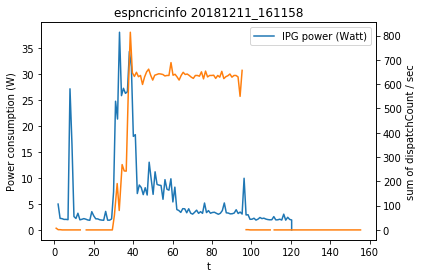

In [56]:
expid, ts = 'espncricinfo', '20181211_161158'
ipg, pc = read_and_munge_data(expid, expid, ts, '~/felix-ec')
plot_compare(ipg, pc, expid, ts)

/home/felix/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  


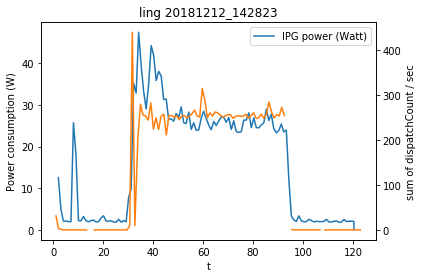

In [57]:
expid, ts = 'ling', '20181212_142823'
ipg, pc = read_and_munge_data(expid, expid, ts, '~/felix-ec')
plot_compare(ipg, pc, expid, ts)

In [6]:
import sklearn.cluster as skc

In [7]:
kipg = skc.KMeans(3)
kipg.fit(ipg['Processor Power_0(Watt)'].values.reshape((-1,1)))
print(expid, ts, 'ipg')
ipg_vals = np.sort(kipg.cluster_centers_[:,0])
ipg_vals

espncricinfo 20181211_161158 ipg


array([ 2.80918391,  9.7926087 , 28.2565    ])

In [8]:
kpc = skc.KMeans(3)
kpc.fit(pc.tabs.apply(lambda x: sum(y['dispatchCount'] for y in x.values())).diff().apply(
        lambda x: x if x >= 0 else np.nan
    ).dropna().values.reshape((-1,1)))
print(expid, ts, 'pc')
pc_vals = np.sort(kpc.cluster_centers_[:,0])
pc_vals

espncricinfo 20181211_161158 pc


/home/felix/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  


array([  1.75581395, 236.25      , 637.42105263])

In [9]:
(ipg_vals[1] - ipg_vals[0]) / (pc_vals[2] - pc_vals[0])

0.01098601018694794

In [111]:
kipg = skc.KMeans(3)
kipg.fit(ipg['Processor Power_0(Watt)'].values.reshape((-1,1)))
print(expid, ts, 'ipg')
ipg_vals = np.sort(kipg.cluster_centers_[:,0])
ipg_vals

ling 20181212_142823 ipg


array([ 2.82401786, 25.90877358, 38.22527273])

In [112]:
kpc = skc.KMeans(2)
kpc.fit(pc.tabs.apply(lambda x: sum(y['dispatchCount'] for y in x.values())).diff().apply(
        lambda x: x if x >= 0 else np.nan
    ).dropna().values.reshape((-1,1)))
print(expid, ts, 'pc')
pc_vals = np.sort(kpc.cluster_centers_[:,0])
pc_vals

ling 20181212_142823 pc


/home/felix/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  


array([  1.        , 257.49152542])

In [113]:
(ipg_vals[1] - ipg_vals[0]) / (pc_vals[1] - pc_vals[0])

0.09000202127390507

In [141]:
pc.iloc[50,0]

{'0': {'children': [{'dispatchCount': 5,
    'duration': 0,
    'host': 'moz-nullprincipal:{c7645d78-33d7-4948-b215-b2357340484e}',
    'isWorker': False}],
  'dispatchCount': 5,
  'duration': 0,
  'host': 'moz-nullprincipal:{c7645d78-33d7-4948-b215-b2357340484e}',
  'windowId': 0},
 '1': {'children': [{'dispatchCount': 12,
    'duration': 230706,
    'host': 'resource://gre/modules/osfile/osfile_async_worker.js',
    'isWorker': True},
   {'dispatchCount': 3,
    'duration': 62116,
    'host': 'resource:///modules/sessionstore/SessionWorker.js',
    'isWorker': True}],
  'dispatchCount': 157,
  'duration': 293700,
  'host': 'resource://gre/modules/osfile/osfile_async_worker.js',
  'windowId': 1},
 '4294967297': {'children': [],
  'dispatchCount': 16,
  'duration': 2083,
  'host': 'dfd84cef-f842-2344-b4e3-ea9bfc02a9a5',
  'windowId': 4294967297},
 '4294967298': {'children': [],
  'dispatchCount': 16,
  'duration': 2291,
  'host': 'd4b5efe4-5a1a-b74d-b4d2-889fa01e9dca',
  'windowId': 42

In [146]:
def sum_dispatchCounts(d):
    return sum(sum_dispatchCounts(c) for c in d.get('children', [])) + d['dispatchCount']

In [147]:
sum(sum_dispatchCounts(d) for d in pc.iloc[50,0].values())

/home/felix/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  """Entry point for launching an IPython kernel.
/home/felix/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  


12319

In [182]:
def plot_compare2(ipg, pc, expid, ts):
    cla()
    ipg['Processor Power_0(Watt)'].plot(label='IPG power (Watt)')
    ylabel('Power consumption (W)')
    pc.tabs.apply(lambda x: sum(y['dispatchCount'] for y in x.values())).diff().apply(
        lambda x: x if x >= 0 else np.nan
    ).plot(secondary_y=True, label='parent_sum')
#     pc.tabs.apply(lambda x: sum(sum_dispatchCounts(d) for d in x.values())).diff().apply(
#         lambda x: x if x >= 0 else np.nan
#     ).plot(secondary_y=True, label='deep_sum')
    legend()
    ylabel('sum of dispatchCount / sec')
    title('{} {}'.format(expid, ts))

/home/felix/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  """


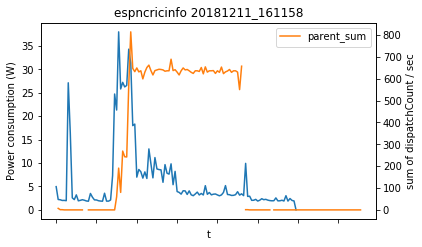

In [183]:
plot_compare2(ipg, pc, expid, ts)

In [155]:
def sum_durations(d):
    return sum(sum_durations(c) for c in d.get('children', [])) + d['duration']

In [185]:
def plot_compare3(ipg, pc, expid, ts):
    cla()
    ipg['Processor Power_0(Watt)'].plot(label='IPG power (Watt)')
    ylabel('Power consumption (W)')
    pc.tabs.apply(lambda x: sum(y['duration'] for y in x.values())).diff().apply(
        lambda x: x if x >= 0 else np.nan
    ).plot(secondary_y=True, label='parent_sum')
#     pc.tabs.apply(lambda x: sum(sum_durations(d) for d in x.values())).diff().apply(
#         lambda x: x if x >= 0 else np.nan
#     ).plot(secondary_y=True, label='deep_sum')
    legend()
    ylabel('sum of duration / sec')
    title('{} {}'.format(expid, ts))

/home/felix/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  """


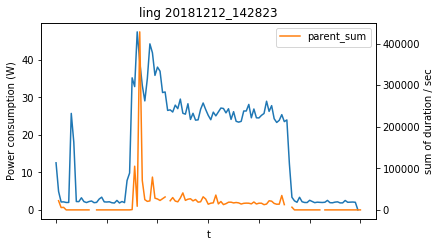

In [186]:
plot_compare3(ipg, pc, expid, ts)

In [165]:
kipg = skc.KMeans(3)
kipg.fit(ipg['Processor Power_0(Watt)'].values.reshape((-1,1)))
print(expid, ts, 'ipg')
ipg_vals = np.sort(kipg.cluster_centers_[:,0])
ipg_vals

espncricinfo 20181211_161158 ipg


array([ 2.80918391,  9.7926087 , 28.2565    ])

In [166]:
kpc = skc.KMeans(3)
kpc.fit(pc.tabs.apply(lambda x: sum(y['duration'] for y in x.values())).diff().apply(
        lambda x: x if x >= 0 else np.nan
    ).dropna().values.reshape((-1,1)))
print(expid, ts, 'pc')
pc_vals = np.sort(kpc.cluster_centers_[:,0])
pc_vals

espncricinfo 20181211_161158 pc


/home/felix/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  


array([   610.23255814,  86906.69230769, 273659.        ])

In [167]:
(ipg_vals[1] - ipg_vals[0]) / (pc_vals[2] - pc_vals[0])

2.5575741846529873e-05

In [169]:
kipg = skc.KMeans(3)
kipg.fit(ipg['Processor Power_0(Watt)'].values.reshape((-1,1)))
print(expid, ts, 'ipg')
ipg_vals = np.sort(kipg.cluster_centers_[:,0])
ipg_vals

ling 20181212_142823 ipg


array([ 2.82401786, 25.90877358, 38.22527273])

In [176]:
kpc = skc.KMeans(3)
kpc.fit(pc.tabs.apply(lambda x: sum(y['duration'] for y in x.values())).diff().apply(
        lambda x: x if x >= 0 else np.nan
    ).dropna().values.reshape((-1,1)))
print(expid, ts, 'pc')
pc_vals = np.sort(kpc.cluster_centers_[:,0])
pc_vals

ling 20181212_142823 pc


/home/felix/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  


array([ 10609.24545455,  84916.        , 428243.        ])

In [177]:
(ipg_vals[1] - ipg_vals[0]) / (pc_vals[1] - pc_vals[0])

0.0003106683351866958

In [46]:
dbipg = skc.DBSCAN()
dbipg.fit(ipg['Processor Power_0(Watt)'].values.reshape((-1,1)))

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=None, p=None)

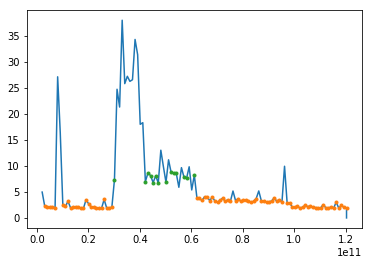

In [29]:
plot(ipg.index, ipg['Processor Power_0(Watt)'])
for i in range(ipg.dbscan_cluster.max() + 1):
    bla = ipg[ipg.dbscan_cluster == i]
    plot(bla.index, bla['Processor Power_0(Watt)'], '.')

In [11]:
def read_and_munge_data2(expid, ts, path):
    ipg = pd.read_csv(
        '{path}/exp_{expid}_{ts}/ipg_{expid}_1_clean.txt'.format(expid=expid, ts=ts, path=path)
    )
    pc = pd.read_json(
        '{path}/exp_{expid}_{ts}/ff_perf_counter_sampled_data.json'.format(expid=expid, ts=ts, path=path)
    )
    bla = "{} {}".format(pc.timestamp.dt.date[0], ipg.loc[0, 'System Time'])
    assert bla[-4] == ':'
    b2 = bla.split(':')
    ipg['t'] = ipg['Elapsed Time (sec)'].apply(lambda x: pd.Timedelta(x, 's'))
    ipgt0 = pd.Timestamp(':'.join(b2[:-1]) + '.' + b2[-1]) - ipg.loc[0, 't']
    pc['t'] = pc.timestamp - ipgt0
    
    # Pandas doesn't plot timedeltaindex things nicely
    ipg['t'] = ipg['t'].values.astype('int') * 1e-9
    pc['t'] = pc['t'].values.astype('int') * 1e-9

    return ipg.set_index('t'), pc.set_index('t')

/home/felix/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  


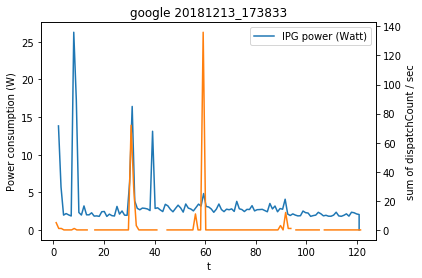

In [64]:
expid, ts = 'google', '20181213_173833'
ipg, pc = read_and_munge_data2(expid, ts, '~/felix-ec/kahuna_1')
plot_compare(ipg, pc, expid, ts)

/home/felix/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  


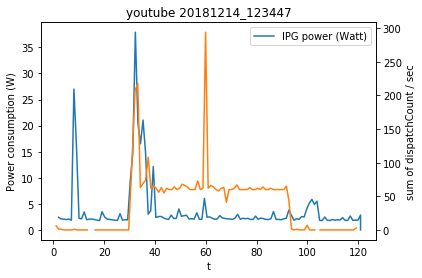

In [72]:
expid, ts = 'youtube', '20181214_123447'
ipg, pc = read_and_munge_data2(expid, ts, '~/felix-ec/kahuna_2')
plot_compare(ipg, pc, expid, ts)

/home/felix/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  


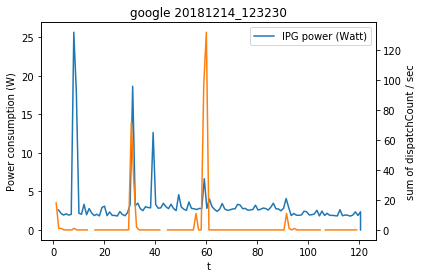

In [70]:
expid, ts = 'google', '20181214_123230'
ipg, pc = read_and_munge_data2(expid, ts, '~/felix-ec/kahuna_2')
plot_compare(ipg, pc, expid, ts)

/home/felix/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  


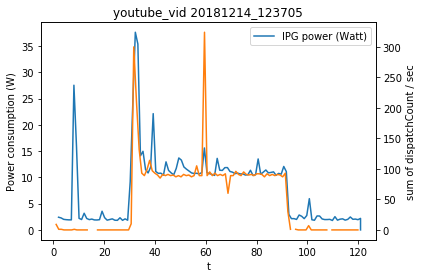

In [75]:
expid, ts = 'youtube_vid', '20181214_123705'
ipg, pc = read_and_munge_data2(expid, ts, '~/Data/kahuna_2')
plot_compare(ipg, pc, expid, ts)

In [215]:
os.listdir('/home/felix/Data/kahuna_2')

['exp_youtube_20181214_123447',
 'exp_nytimes_20181214_125202',
 'exp_slate_20181214_124406',
 'exp_youtube_vid_20181214_133917',
 'exp_espncricinfo_20181214_135004',
 'exp_twitch_20181214_124722',
 'exp_youtube_20181214_132845',
 'exp_google_pres_20181214_132407',
 'exp_lingscars_20181214_135224',
 'exp_newsweek_article_20181214_130735',
 'exp_espncricinfo_20181214_123923',
 'exp_cbc_article_20181214_140406',
 'exp_rt_article_20181214_131441',
 'exp_lingscars_20181214_124143',
 'exp_cnn_article_20181214_130959',
 'exp_livescience_article_20181214_130516',
 'exp_nytimes_20181214_140144',
 'exp_gizmodo_article_20181214_131703',
 'exp_cbc_article_20181214_125423',
 'exp_youtube_vid_20181214_123705',
 'exp_google_20181214_123230',
 'exp_smh_20181214_135923',
 'exp_cnet_article_20181214_131221',
 'exp_cbs_article_20181214_125907',
 'exp_popsci_article_20181214_130124',
 'exp_bbc_article_20181214_140628',
 'exp_mashable_article_20181214_131924',
 'exp_google_doc_20181214_132147',
 'exp_slat

In [2]:
def normalize_for_clustering(df, weights=None):
    res = df - df.mean()
    res /= res.std()
    if weights is not None:
        res *= weights
    return res.values

In [3]:
def summarize_clusters(df):
    return df.groupby('cluster').agg(['mean', 'std', 'count']).drop(-1)

In [19]:
def plot_clusters(df, directory_name):
    fig = figure(figsize=(16, 4))
    fig.suptitle(directory_name)
    scat = subplot(141)
    scat.set_title('cluster scatterplot')
    scat.set_xlabel('firefox counter value')
    scat.set_ylabel('IPG power (W)')
    badscat = subplot(142)
    badscat.set_title('unclustered points (to ignore)')
    fsrs = subplot(143)
    fsrs.set_title('firefox counter value time series')
    isrs = subplot(144)
    isrs.set_title('IPG power (W) time series')

    for c in df.cluster.unique():
        dc = df[df.cluster == c]
        if c == -1:
            badscat.plot(dc['f'], dc['i'], '.', alpha=0.3, color='grey')
            fsrs.plot(dc.index, dc['f'], '.', alpha=0.3, color='grey', label='unclustered')
            isrs.plot(dc.index, dc['i'], '.', alpha=0.3, color='grey', label='unclustered')
            continue
        scat.plot(dc['f'], dc['i'], '.', alpha=0.3, label=c)
        fsrs.plot(dc.index, dc['f'], '.', alpha=0.6, label=c)
        isrs.plot(dc.index, dc['i'], '.', alpha=0.6, label=c)

    scat.legend()
    
    show()

In [5]:
def parse_directory_name(directory_name):
    bits = directory_name.split('_')
    expid = '_'.join(bits[1:-2])
    ts = '_'.join(bits[-2:])

    return expid, ts

In [6]:
def conform_series(fpow, ipow):
    """Take two time series and conform them to a common index.
    
    This is not a great function right now.
    
    In a perfect world, both of our time series would be measured
    at precisely one-second intervals, starting exactly on the second,
    starting at the same moment in time, and ending at the same moment
    in time, and with no missing values.
    
    In a slightly less perfect world, at least one time series would
    start exactly on the second and be sampled at exactly one-second
    intervals with no missing values. Then we would conform the other
    time series to the regular time series' index, interpolating using 
    method 'nearest' (linear interpolation is not a good match here i think?)
    and using each value at most once.
    
    In a slightly less perfect world than that, we would choose one time
    series' index as canonical and conform the other time series' index to
    that, interpolating in the same way (using 'nearest' and using each
    value at most once).
    
    In reality, this function conforms both series to np.arange(), which
    will have disastrous consequences if one time series is mostly measured
    at 499 milliseconds past the second and the other is mostly measured 
    at 501 milliseconds past the second.
    
    Please fix.
    """
    
    df = pd.DataFrame({
        'f': fpow.reindex(np.arange(int(max(ipow.index.max(), fpow.index.max()))), method='nearest'),
        # Mysteriously the final timestamp in IPG is often duplicated, with the second value being zero.
        'i': ipow.iloc[:-1].reindex(np.arange(int(max(ipow.index.max(), fpow.index.max()))), method='nearest'),
    })
    df['t'] = df.index
    return df.dropna(how='any')


In [34]:
def do_thing(path, directory_name):
    expid, ts = parse_directory_name(directory_name)

    ipg, pc = read_and_munge_data2(expid, ts, path)

    ipow = ipg['Processor Power_0(Watt)']
    fpow = pc.tabs.apply(lambda x: sum(list(y['dispatchCount'] for y in x.values()))).diff().apply(
            lambda x: x if x >= 0 else np.nan
    )

    df = conform_series(fpow, ipow)

    dbs = skc.DBSCAN(eps=0.2)
    df['cluster'] = dbs.fit_predict(normalize_for_clustering(df, np.array([1, 1, 2e-1])))

    plot_clusters(df, directory_name)
    
    return expid, summarize_clusters(df)

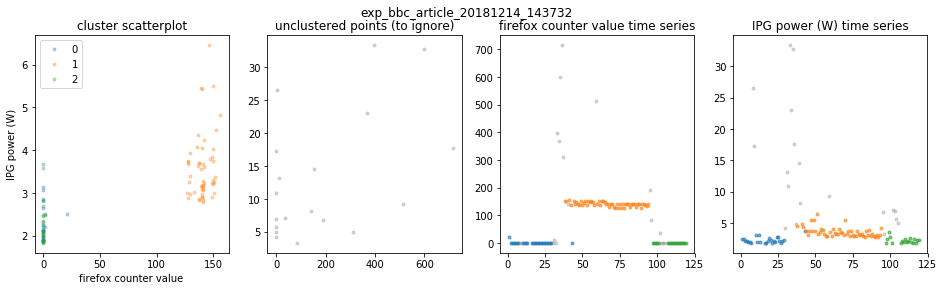

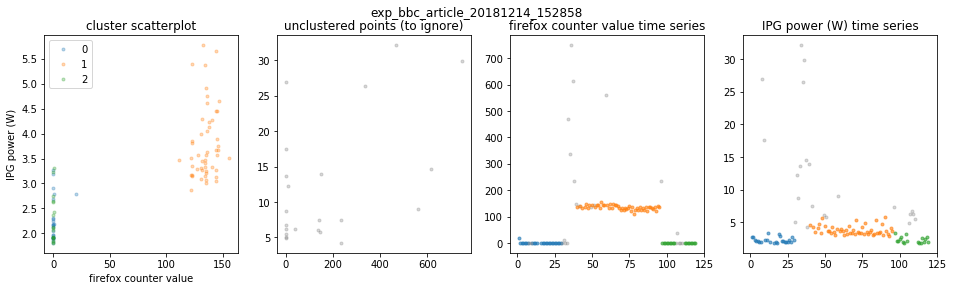

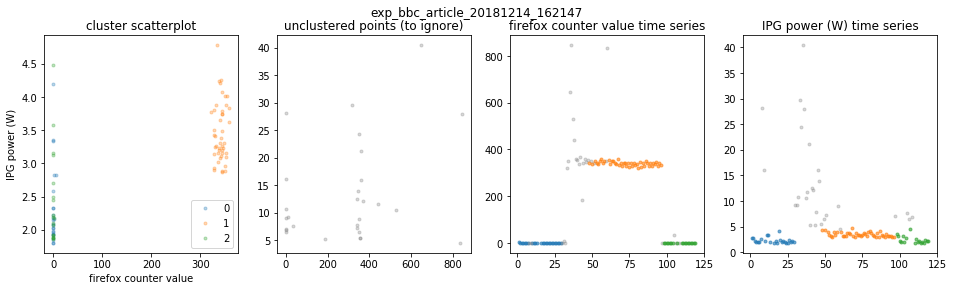

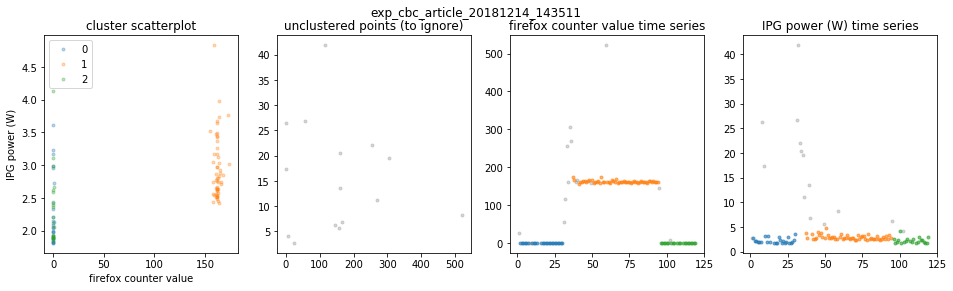

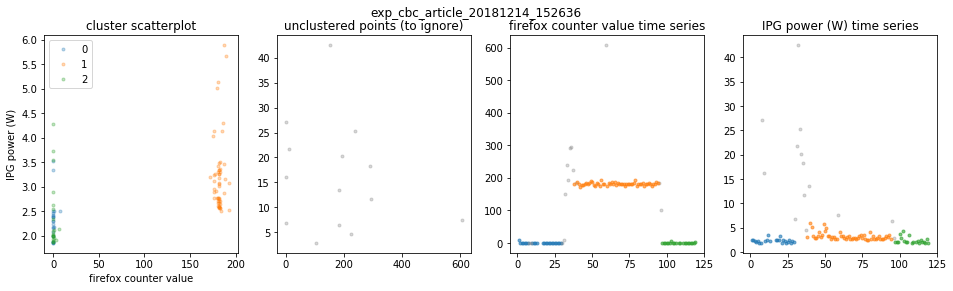

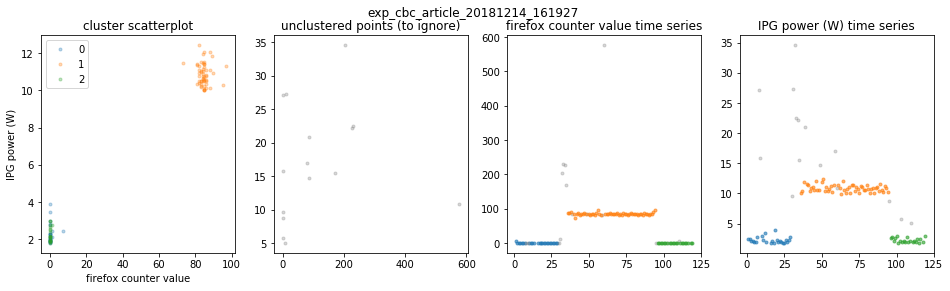

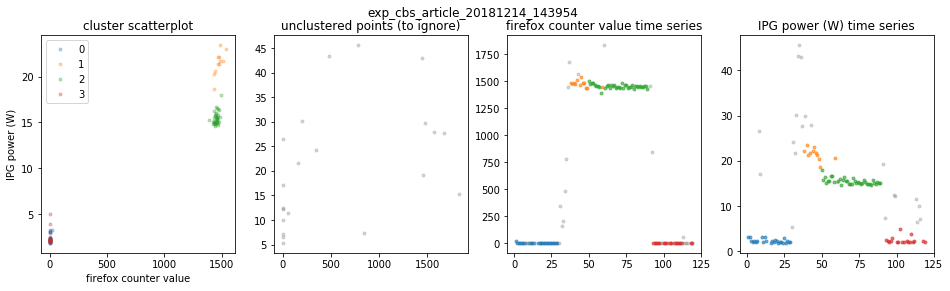

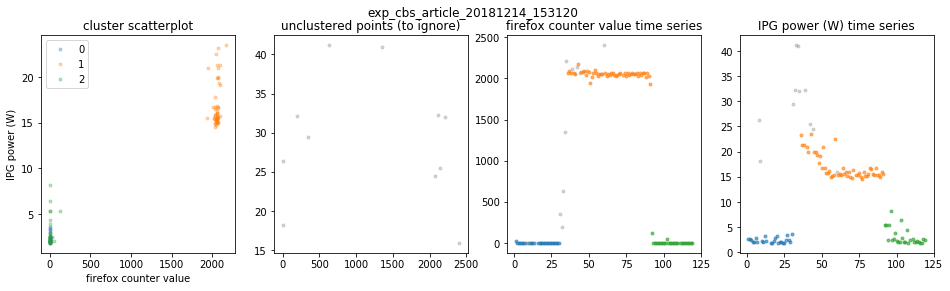

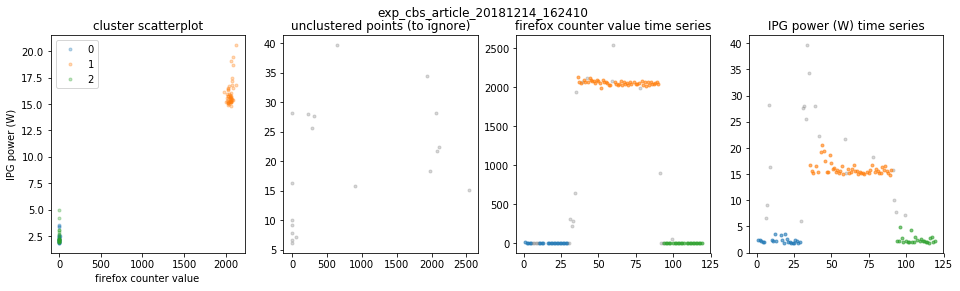

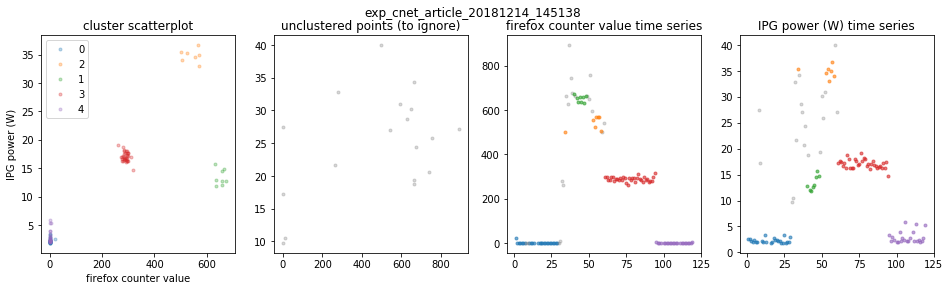

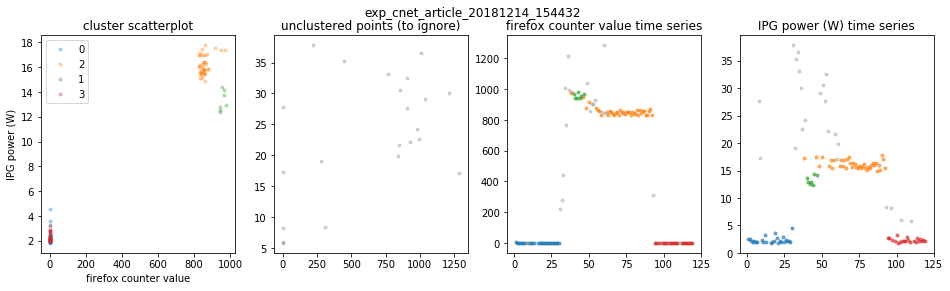

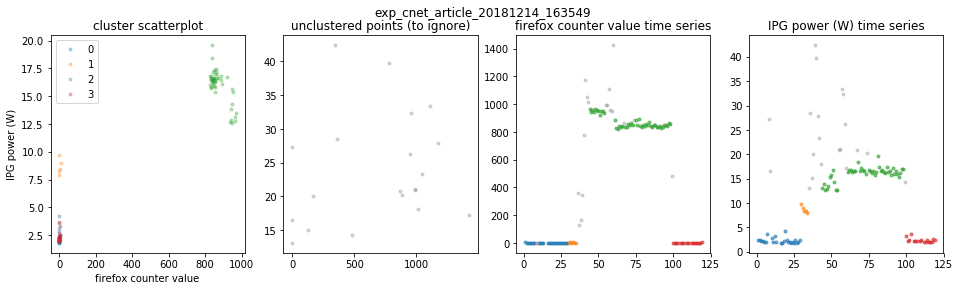

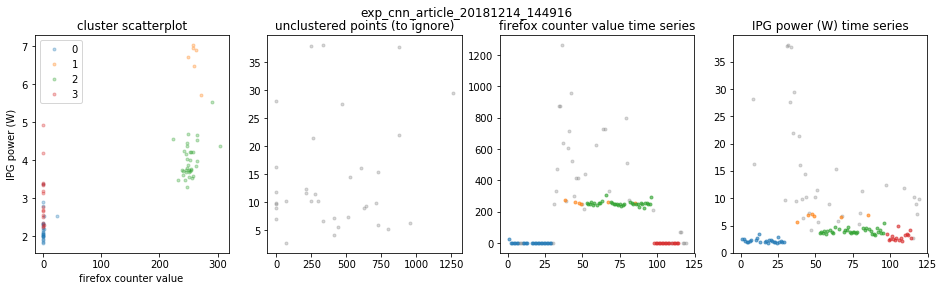

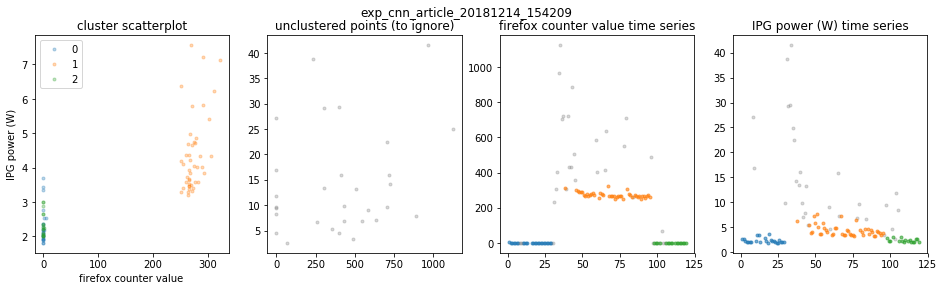

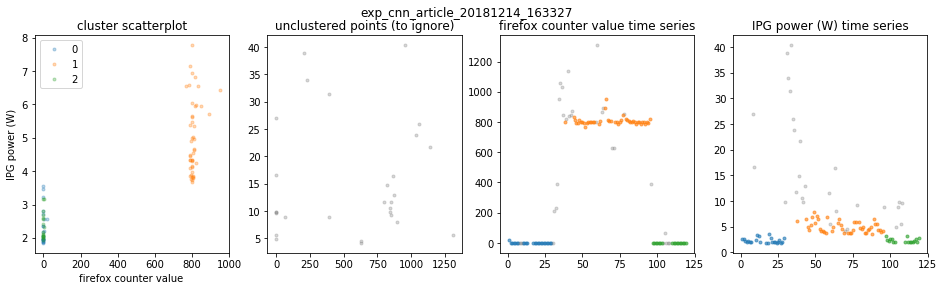

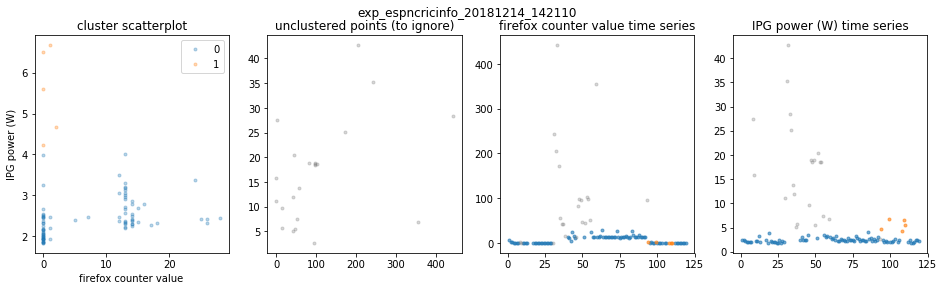

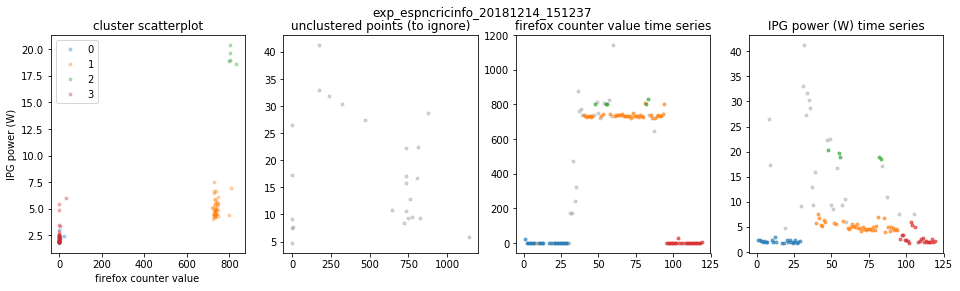

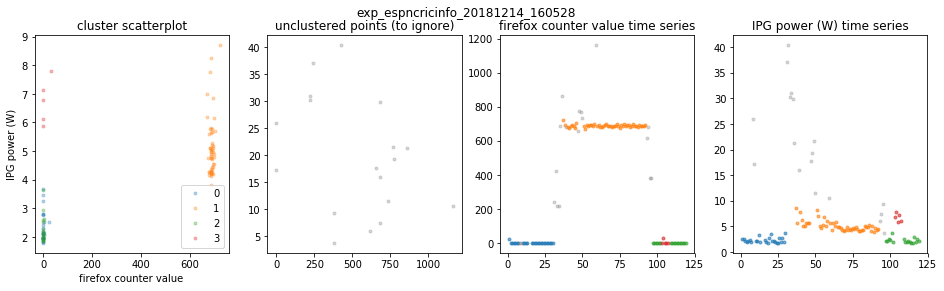

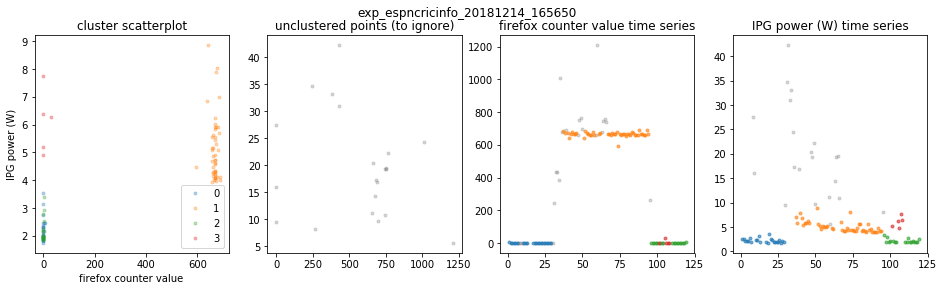

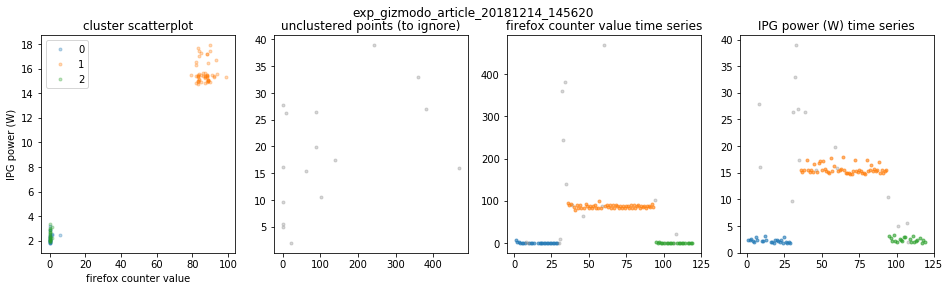

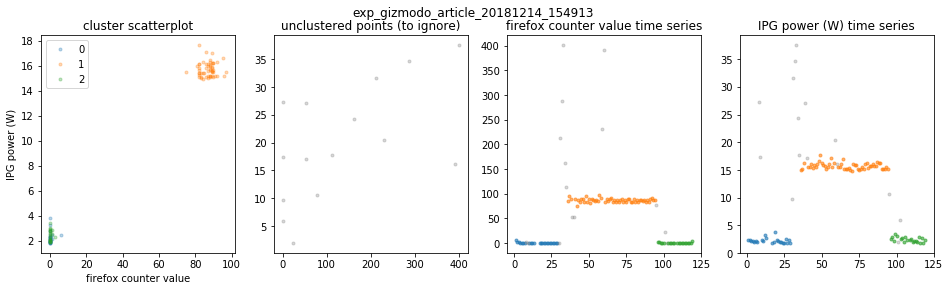

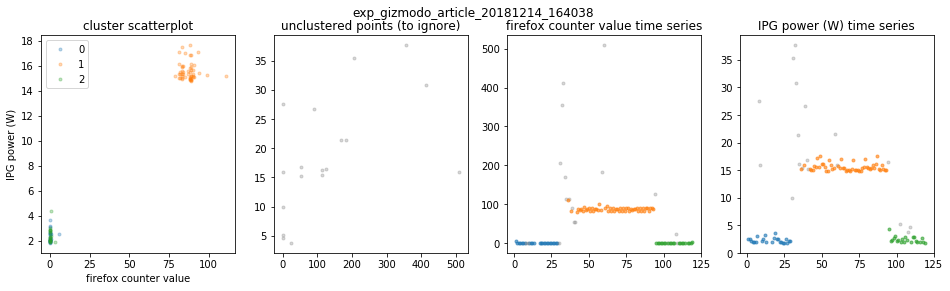

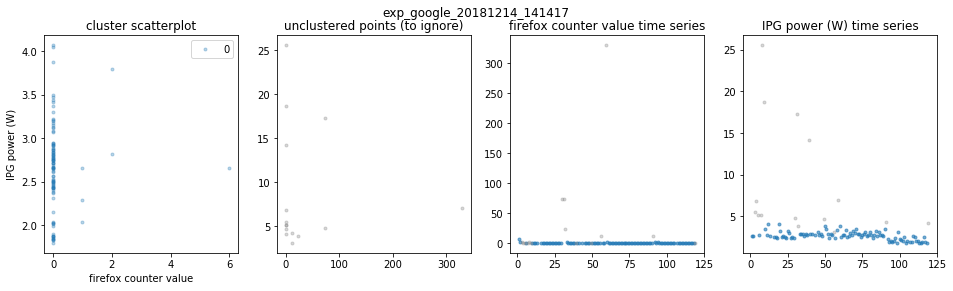

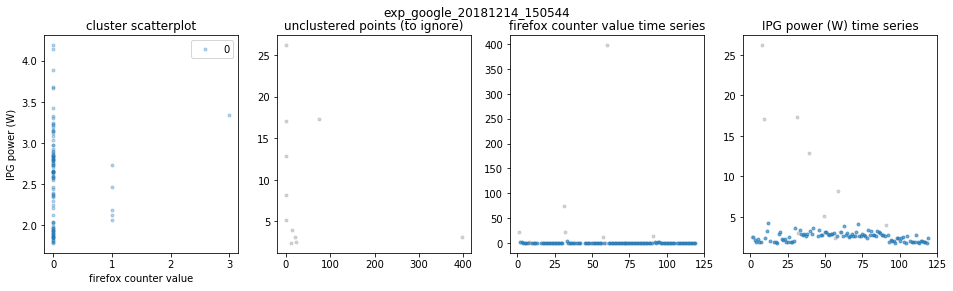

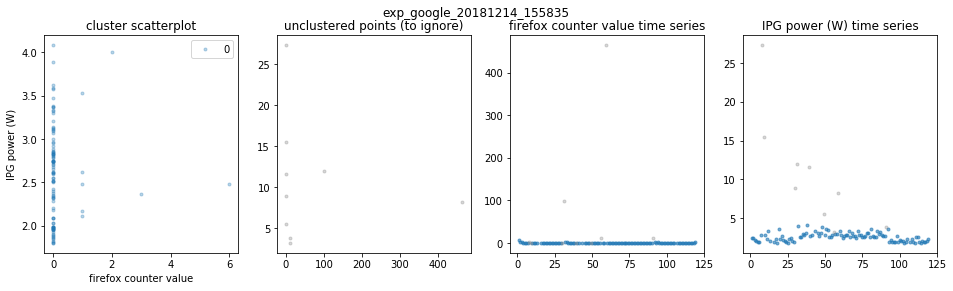

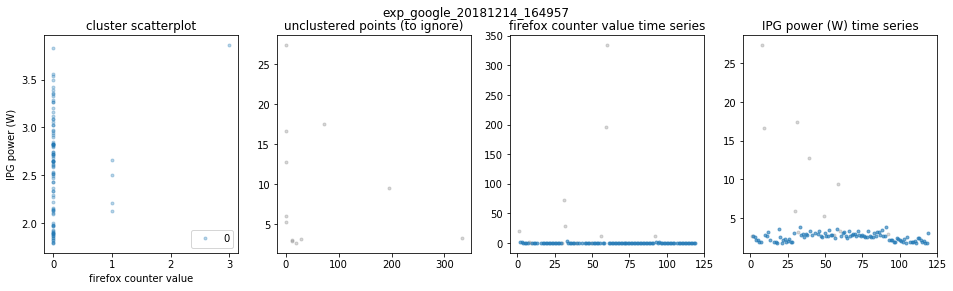

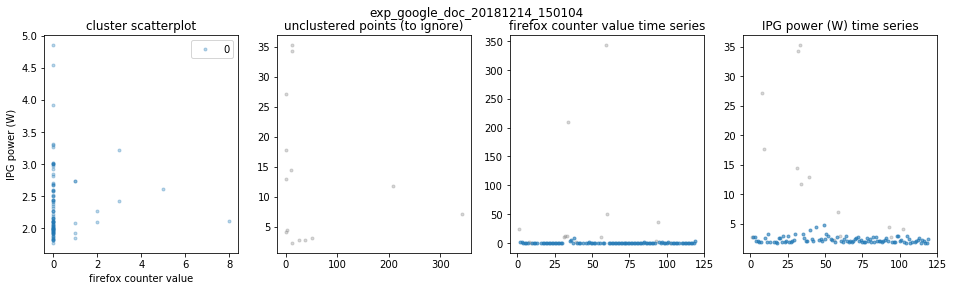

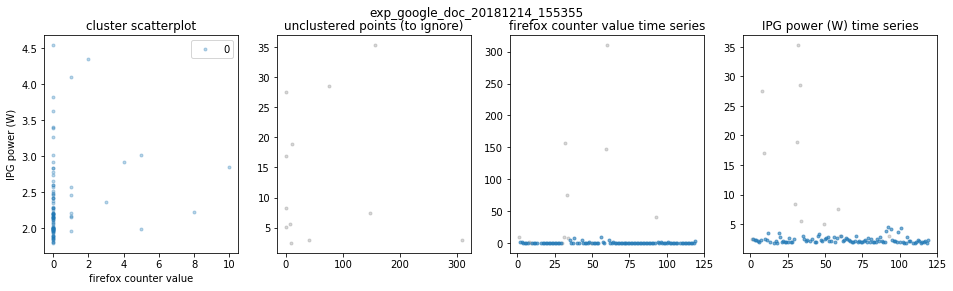

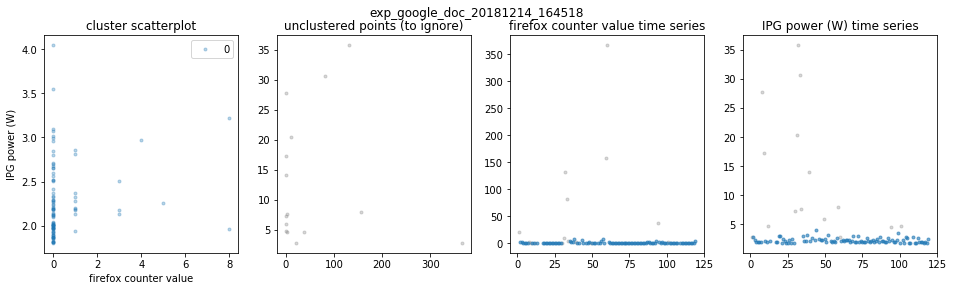

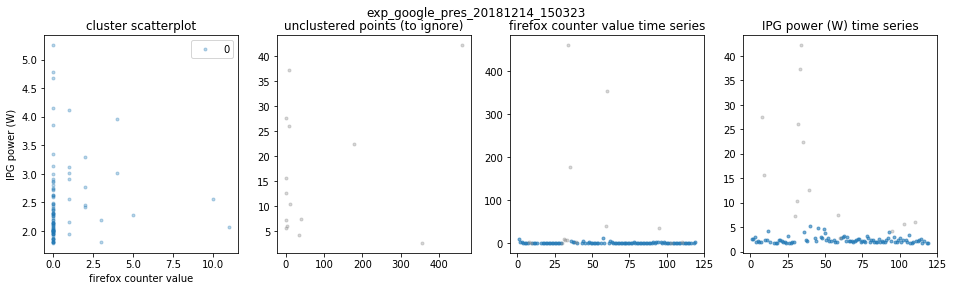

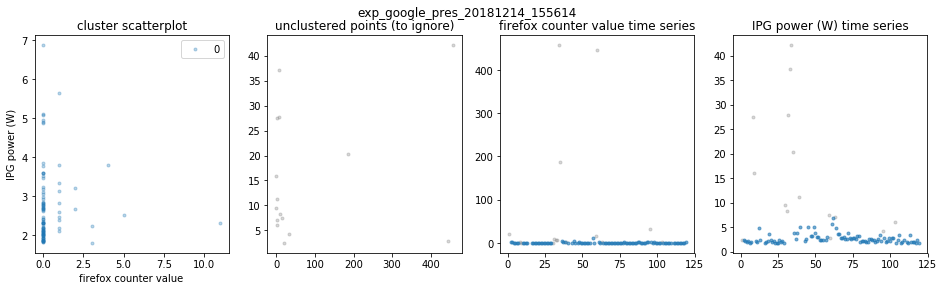

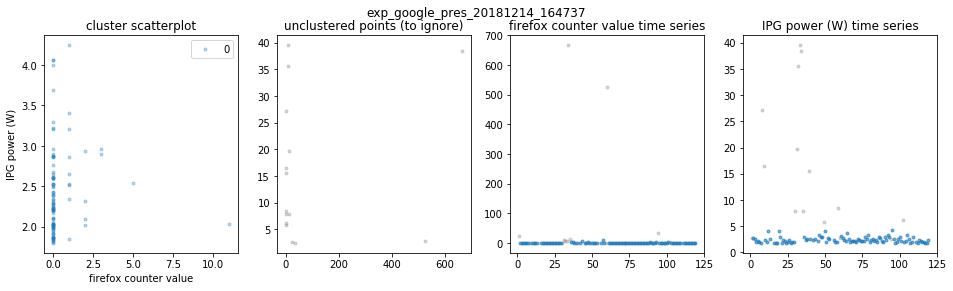

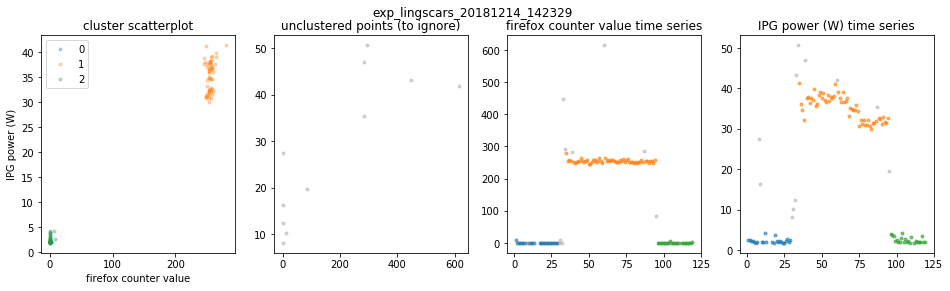

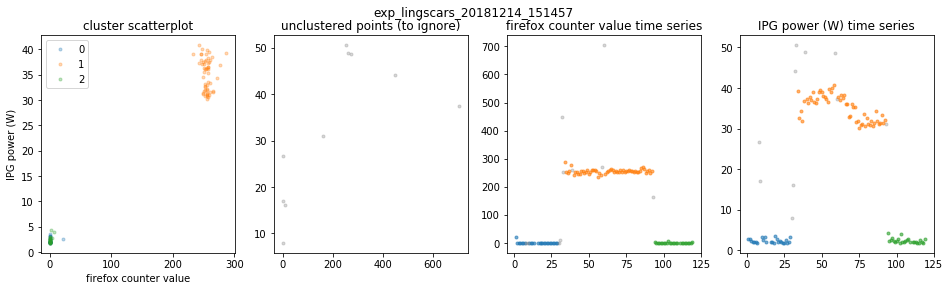

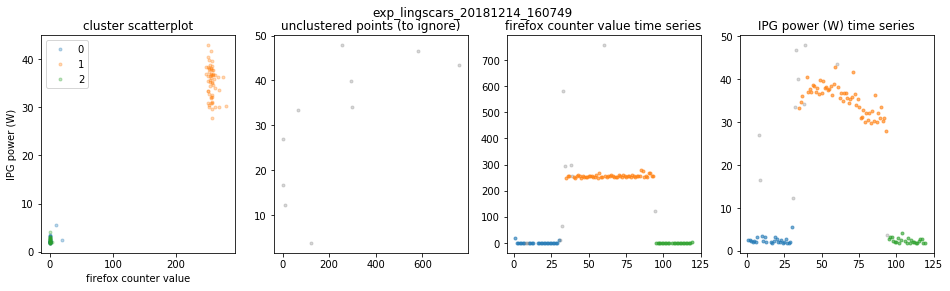

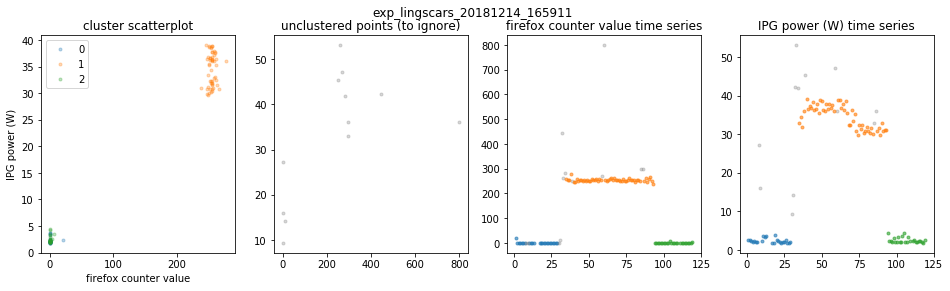

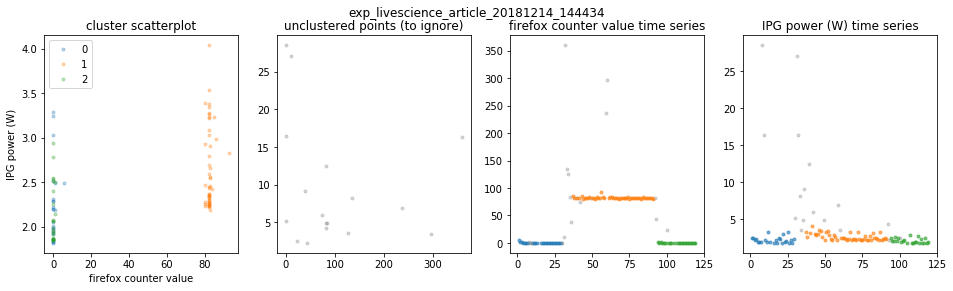

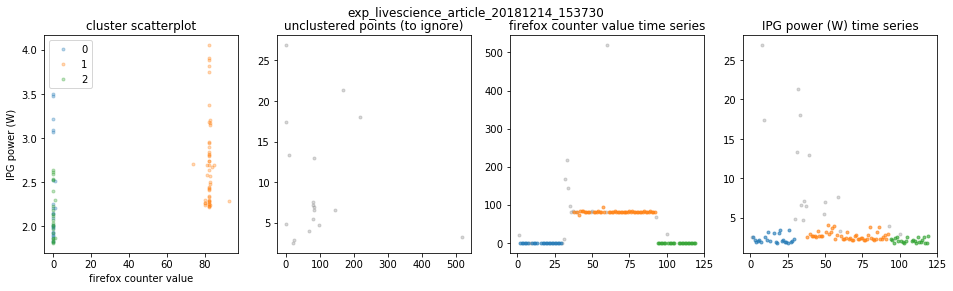

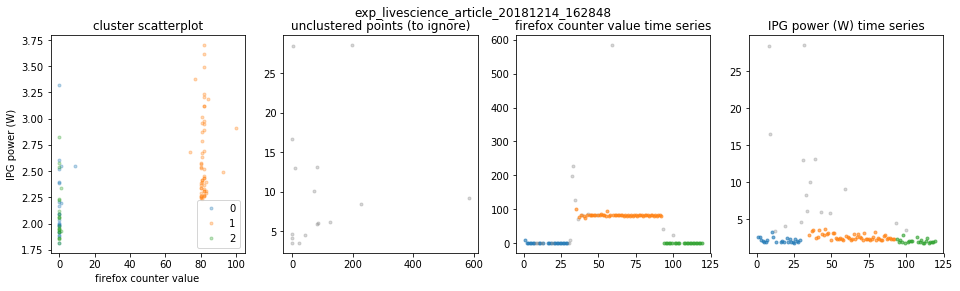

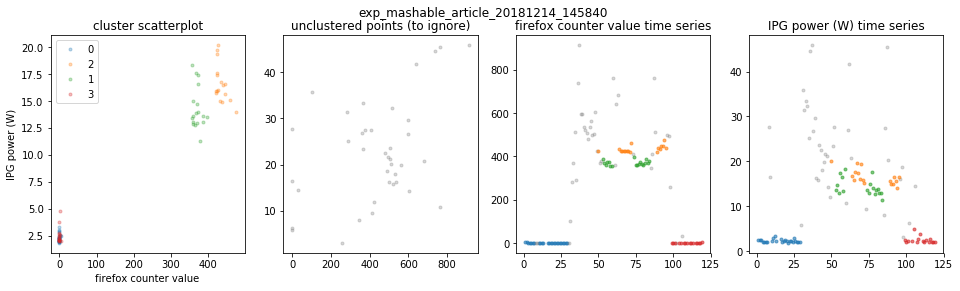

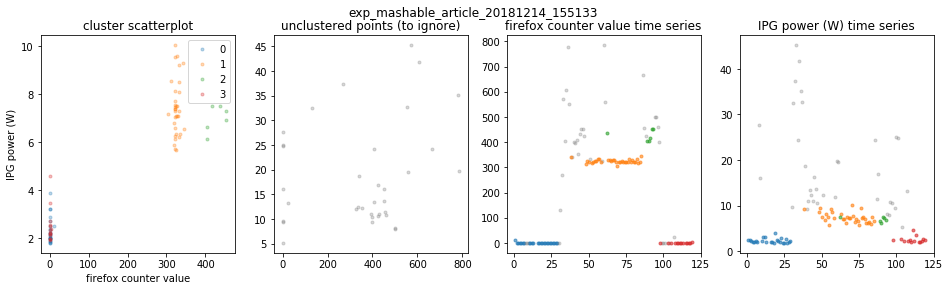

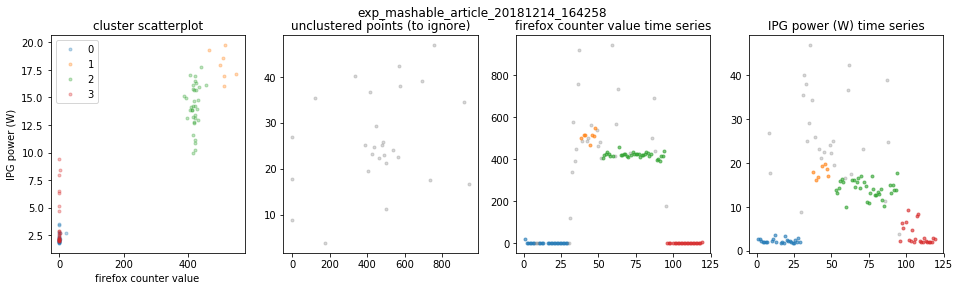

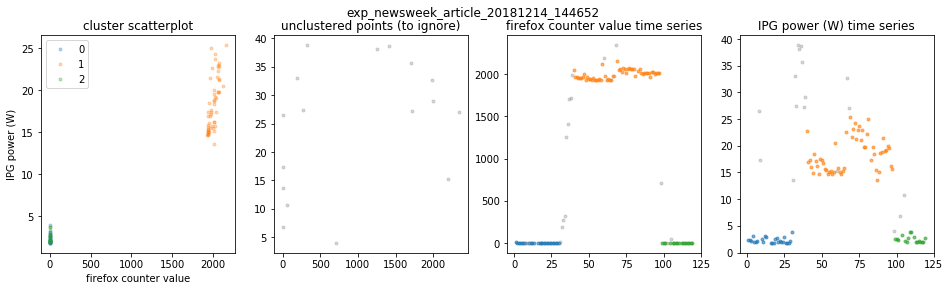

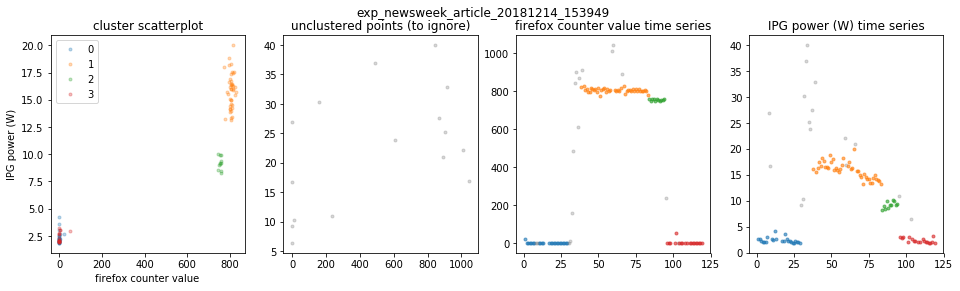

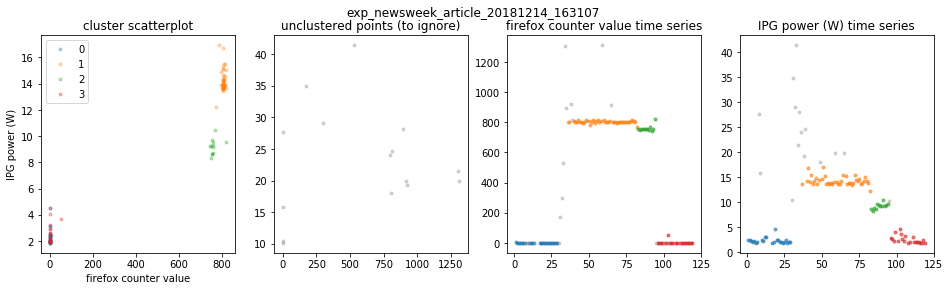

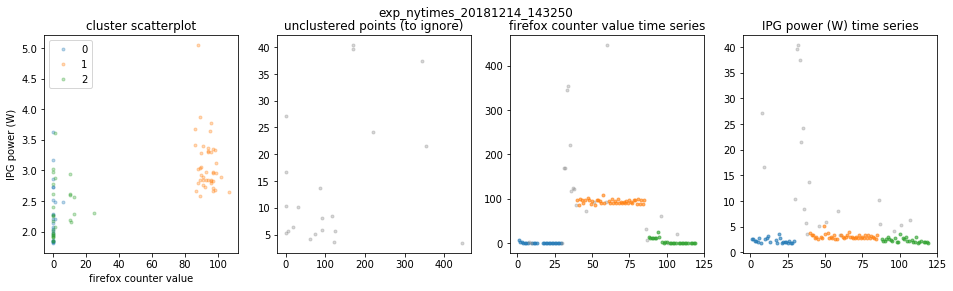

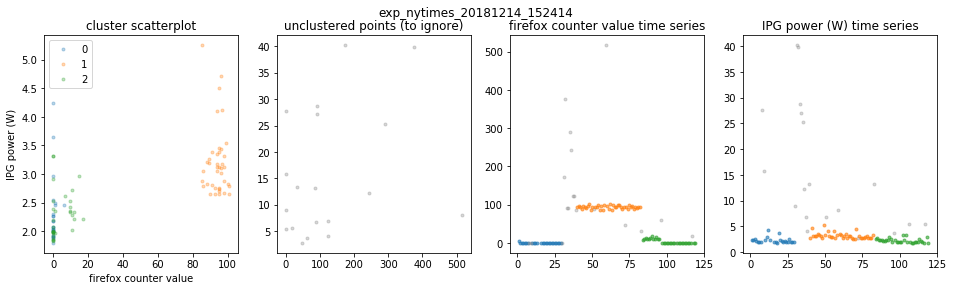

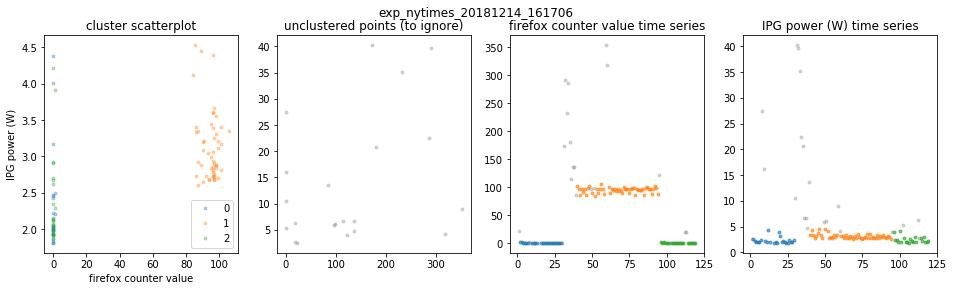

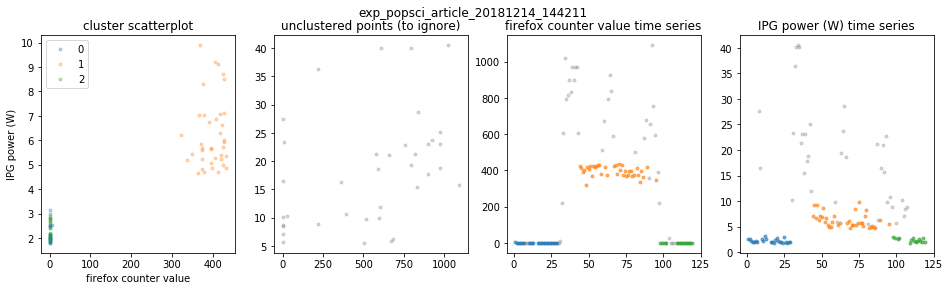

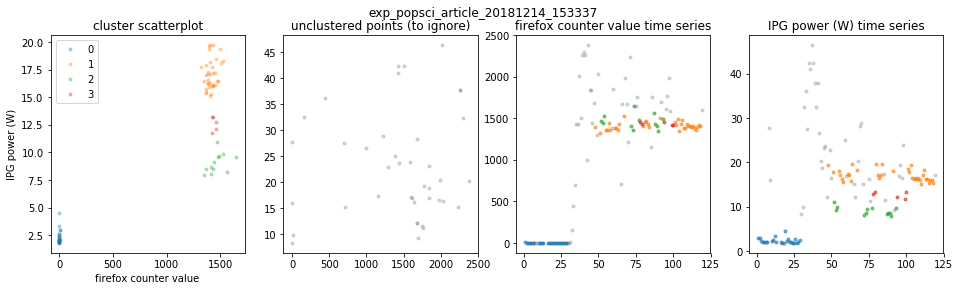

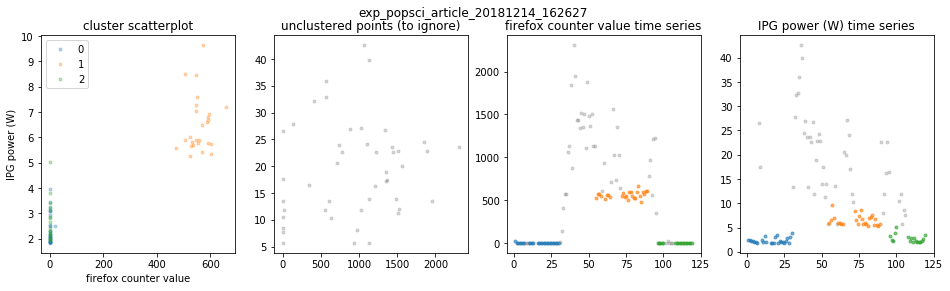

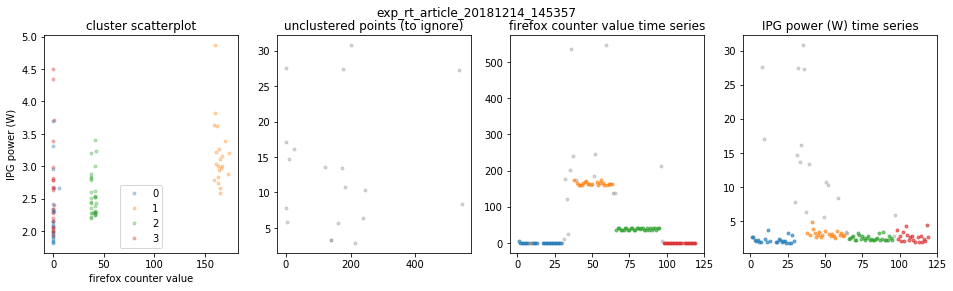

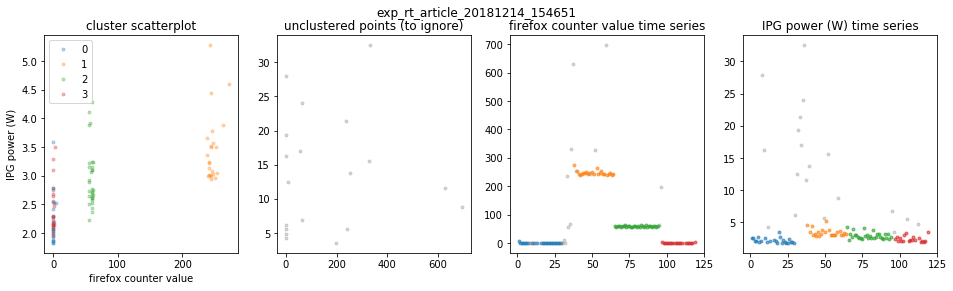

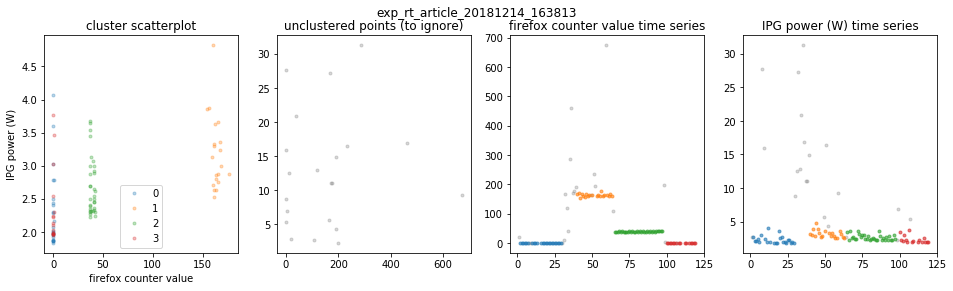

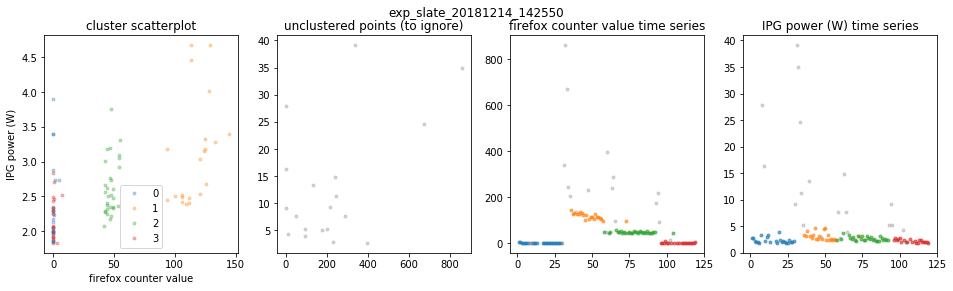

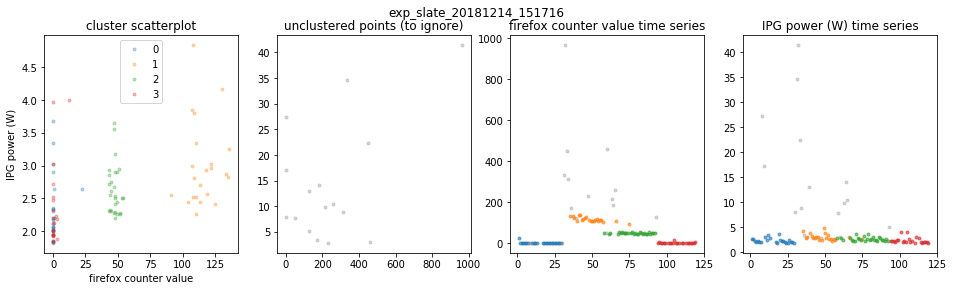

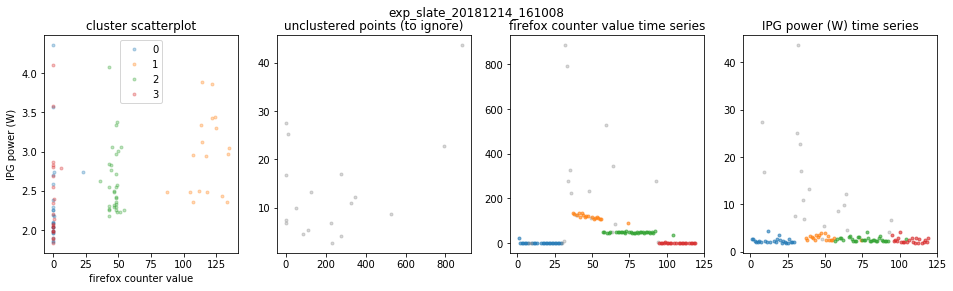

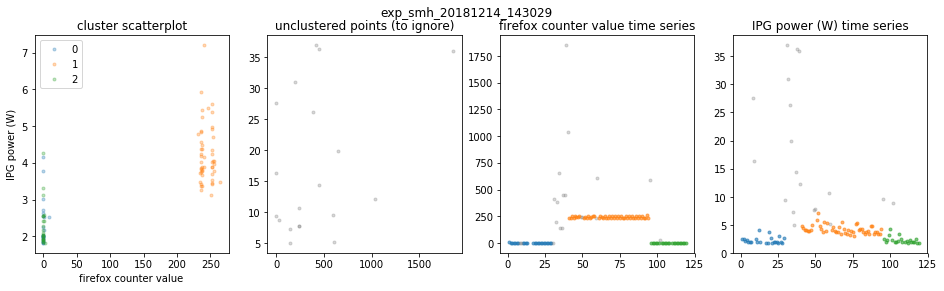

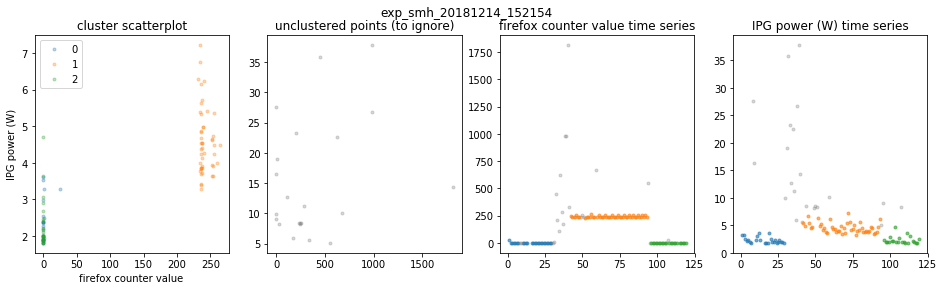

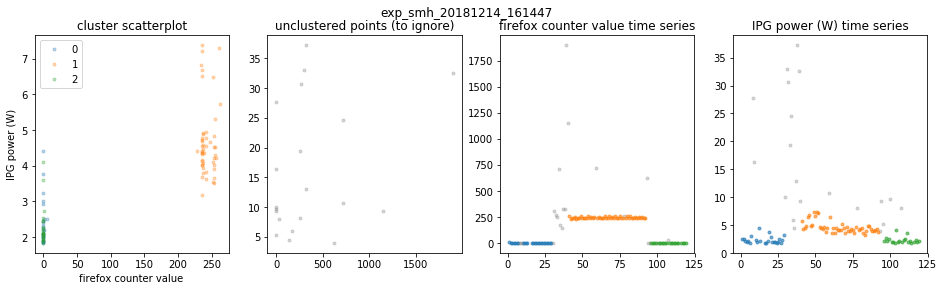

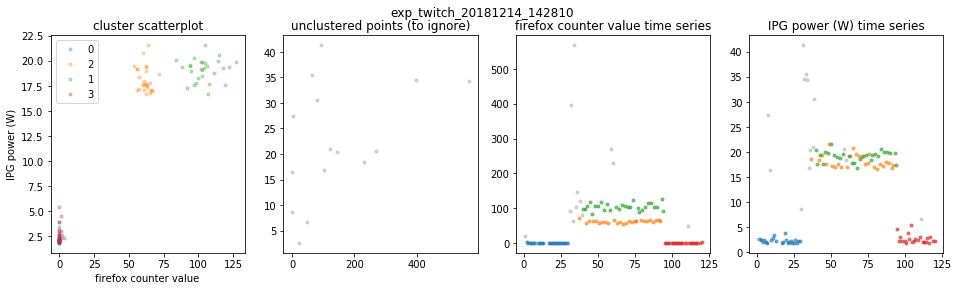

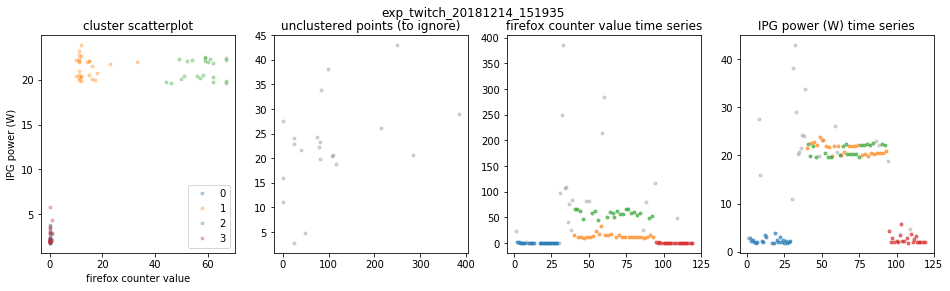

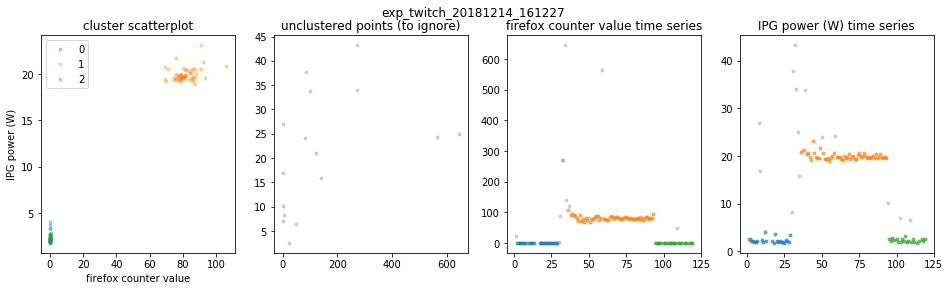

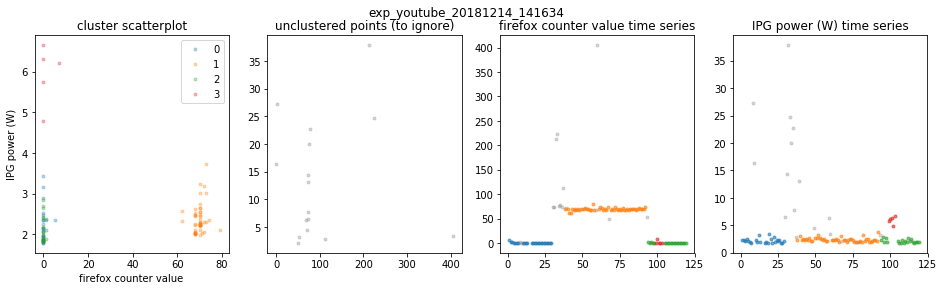

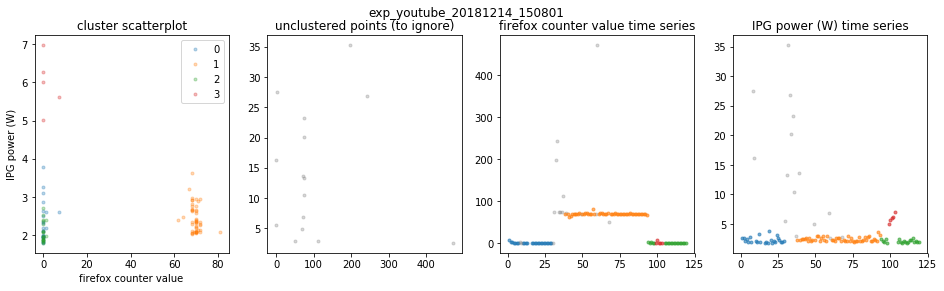

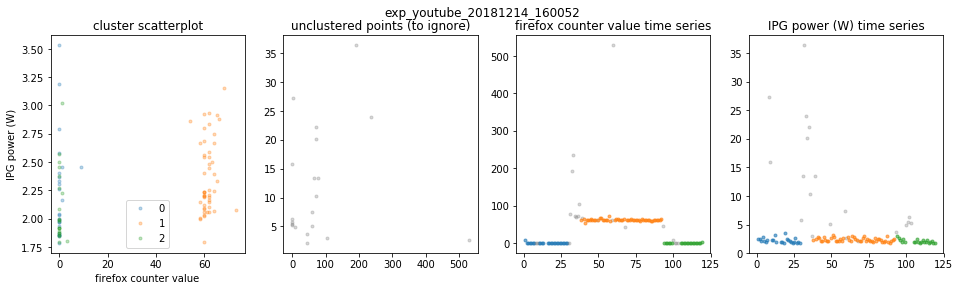

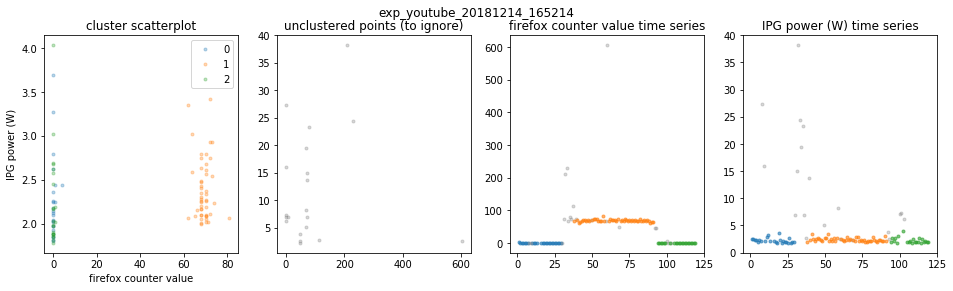

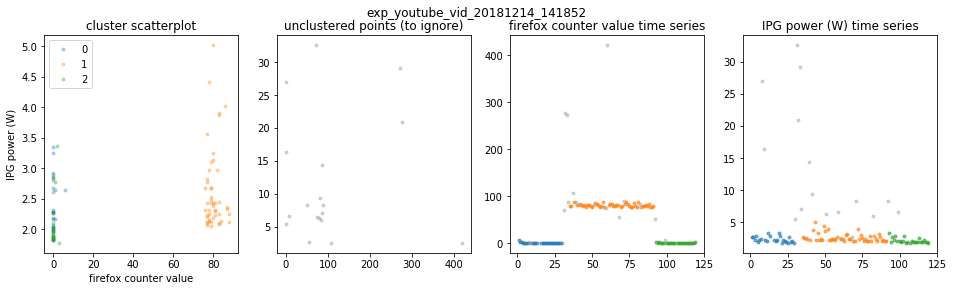

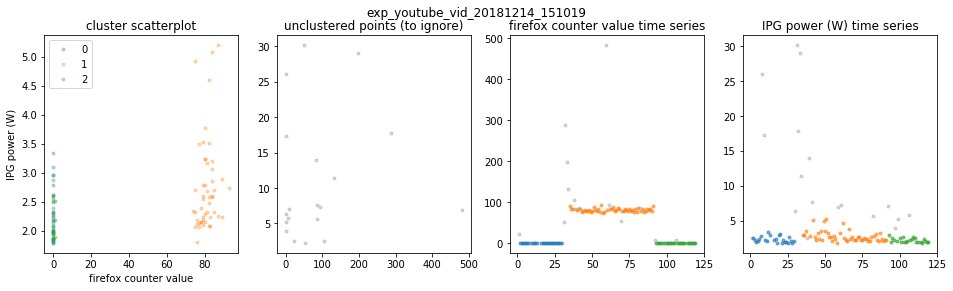

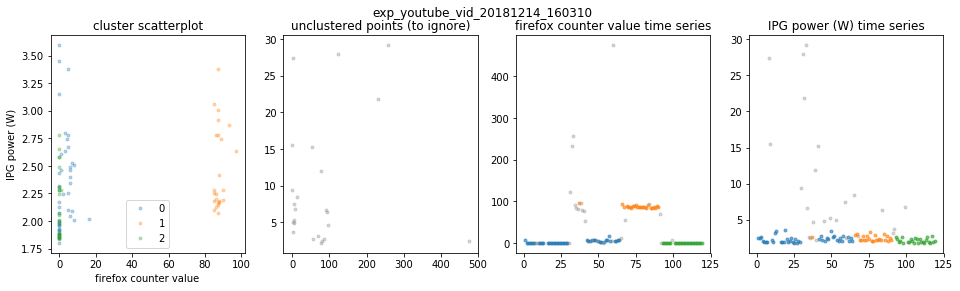

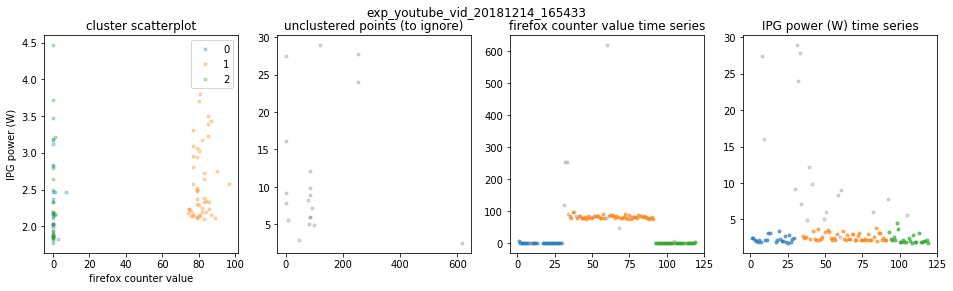

In [36]:
path = '/home/felix/Data/kahuna_3'
res = [do_thing(path, d) for d in sorted(os.listdir(path))]

Text(0, 0.5, 'IPG power (W)')

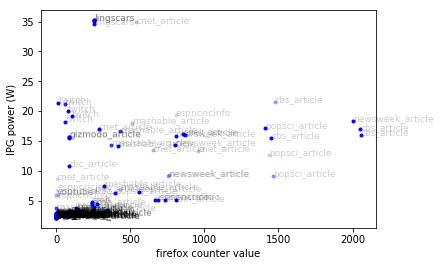

In [38]:
cla()
# res2 = pd.concat(res)
for lbl, res2 in res:
    for _, r in res2.iterrows():
        plot(r[('f', 'mean')], r[('i', 'mean')], '.b', alpha=r[('f', 'count')]/res2[('f', 'count')].max())
        text(r[('f', 'mean')], r[('i', 'mean')], lbl, alpha=0.2, fontsize=9)

xlabel('firefox counter value')
ylabel('IPG power (W)')